# Udacity Data Scientist Nanodegree




### Analyzing Stack Overflow Survey Data


Udacity Data Scientist Nanodegree Analyzing Stack Overflow Survey Data Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, salary, code style and various other information. In the year 2017, they amassed more than 64,000 responses fielded from 213 countries.

When do people start to work? 
Do the people start to work earlier in USA or India? 
Do people who work from home start work earlier?

##Content
*   Gather Data
*   Assess Data
*   Clean Data
*   Exploratory Analyses
*   Explanatory Visualization

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##Gather Data

Gather Data
The data is manually downloaded from kaggle: https://www.kaggle.com/stackoverflow/so-survey-2017

In [6]:
#data reading survey_results_public
df = pd.read_csv('survey_results_public.csv',error_bad_lines=False)

<ipython-input-6-a0c4af4704c9>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('survey_results_public.csv',error_bad_lines=False)


In [7]:
# data reading survey_results_schema
df_schema = pd.read_csv('survey_results_schema.csv')

## Assess Data

In [8]:
df_schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [ ]:
df_schema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Column    154 non-null    object
 1   Question  154 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [ ]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Salary,ExpectedSalary
count,25190.000000,5064.000000
mean,56047.431729,33148.831128
std,39778.713615,30225.172537
min,0.000000,0.000000
25%,26250.000000,4404.639554
50%,50000.000000,29364.263691
75%,80000.000000,50537.634409
max,197000.000000,187500.000000


## Summary:


*   Dataset is very large, 151 columns. Therefore most of this work is done directly at kraggl.
*   Some tables show NaN values.:

## Clean Data

In [ ]:
# copy of the dataset
dfn = df.copy()

In [ ]:
# Identify null values
dfn['WorkStart'].isnull().sum()

28871

In [ ]:
# Clear nan values
dfn = dfn[dfn['WorkStart'].notna()]

In [ ]:
# Verification
dfn['WorkStart'].isnull().sum()

0

In [ ]:
# Identify null values
dfn['Country'].isnull().sum()

0

In [ ]:
# subsets of data for each country
dfn_india = dfn[dfn['Country'].str.contains('India')]
dfn_us = dfn[dfn['Country'].str.contains('United States')]

## Exploratory Analyses

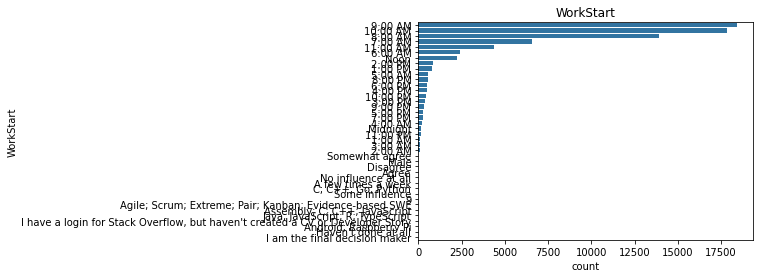

In [ ]:
plt.title("WorkStart")
sns.countplot(data = dfn, y = 'WorkStart', order = dfn['WorkStart'].value_counts().index,
             color = sns.color_palette()[0]);

A large majority of people start work between 7:00 and 12:00. For Facility it will be validated between 1:00 PM and 11 PM

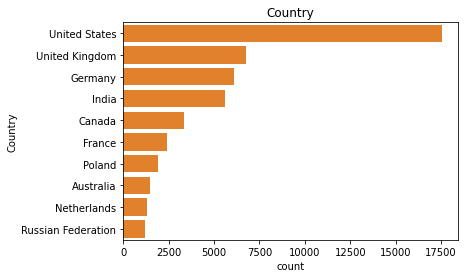

In [ ]:
dfn.WorkStart
plt.title("Country")
sns.countplot(data = dfn, y = 'Country', order = dfn['Country'].value_counts().nlargest(10).index,
             color = sns.color_palette()[1]);

Due to the number of countries, the data from India and the United States are validated.

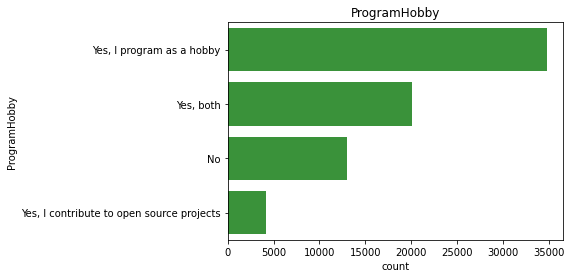

In [ ]:
dfn.WorkStart
plt.title("ProgramHobby")
sns.countplot(data = dfn, y = 'ProgramHobby', order = dfn['ProgramHobby'].value_counts().index,
             color = sns.color_palette()[2]);

A vast majority programs Stackoverflow as a hobby and there are others who just do it as a hobby.

## Explanatory Visualization

In [ ]:
# As we generate 3 neraly identical plots we define a function for it.
def plot_workstart(dfn, title, axis):
    ''' Plots selected WorkStart for given dataset, plot titel and axis identifier.'''
    
    work_order = ["1:00 PM", "2:00 PM", "3:00 PM", "4:00 PM", "5:00 PM", "6:00 PM", "7:00 PM", "8:00 PM", "9:00 PM", "10:00 PM", "11:00 PM", "Evening"]
    sns.countplot(ax=axis,x = "WorkStart", data = dfn, order = work_order, color = sns.color_palette()[3])
    plt.xlabel('WorkStart');
    plt.ylabel('Count');
    axis.title.set_text(title)
    axis.tick_params(rotation=45)

1.When do people start to work?

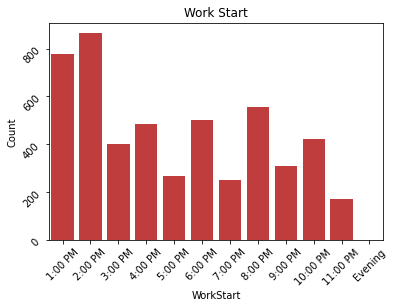

In [ ]:
fig = plt.figure()  # create the figure
ax = fig.add_subplot(1, 1, 1)  # create the axes of the figure
plot_workstart(dfn, "Work Start", ax)

### Explain the visualization
Most people clearly start to work arround 2:00 PM.

2.Do the people start to work earlier in USA or India?

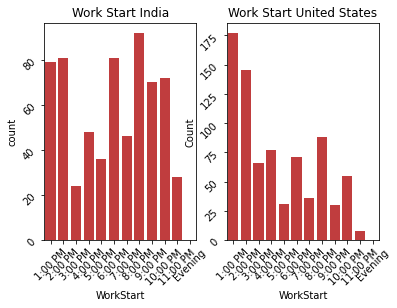

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plot_workstart(dfn_india, 'Work Start India', ax1)
plot_workstart(dfn_us, 'Work Start United States', ax2)

### Explain the visualization
People in India start work at 7:00 p.m. and people in the United States at 1:00 p.m., indicating that people in the United States start work earlier than in India.

3. Do people who work from home start work earlier?





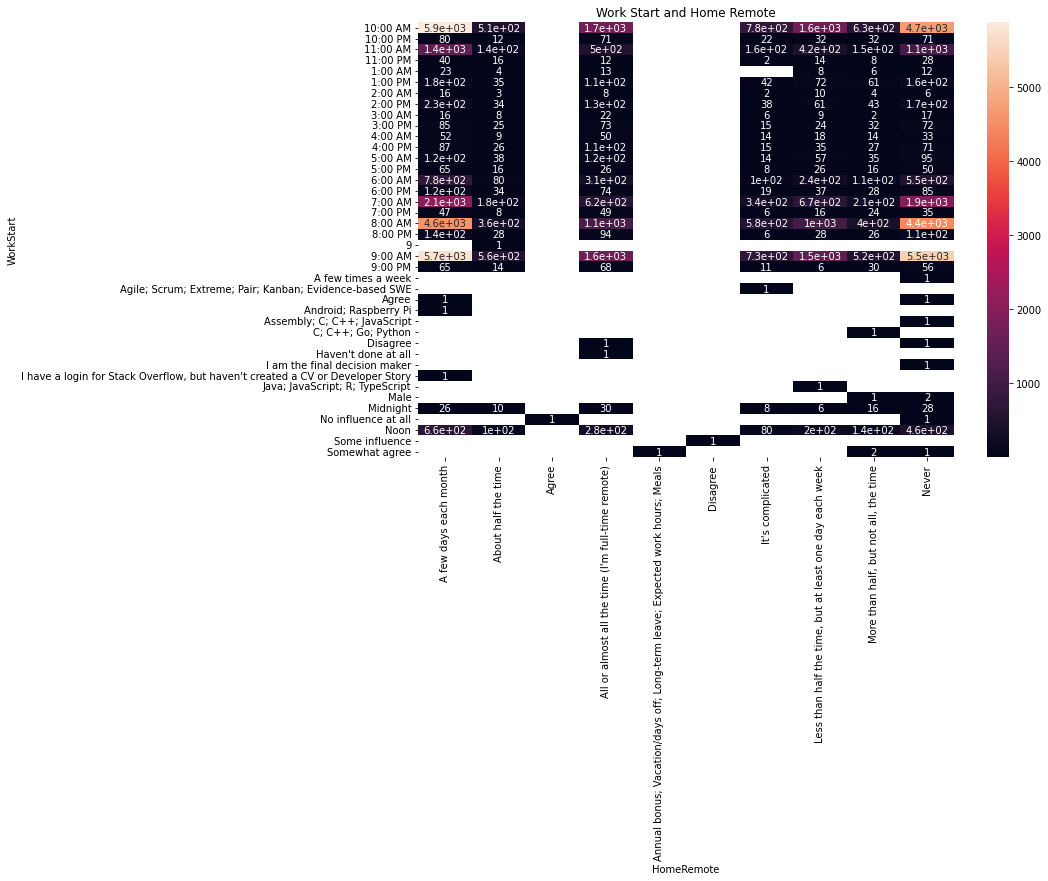

In [ ]:
plt.figure(figsize = [12, 8])
temp = dfn.groupby(['HomeRemote', 'WorkStart']).size()
temp = temp.reset_index(name = 'count')
temp = temp.pivot(index = 'WorkStart', columns = 'HomeRemote', values = 'count')
sns.heatmap(temp, annot = True);
plt.title('Work Start and Home Remote');

### Explain the visualization
It seems that no one disagrees with not working from home, the graph shows that more work is done in the morning around 10:00 A.M., people prefer to work remotely, that is what the graph shows

### Evaluation
The information has several factors but it was interesting to know that people like to work more from home.

Of the greatest advantages are:
*   Higher productive
*   Save of time and money
*   Greater autonomy and less stress
*   Physical space